Activation funtions

In [39]:
import math

def sigmoid(x):
  return 1/(1+math.exp(-x))

In [40]:
sigmoid(100)

1.0

In [41]:
sigmoid(1)

0.7310585786300049

In [42]:
sigmoid(0.5)

0.6224593312018546

In [43]:
def tanh(x):
  return (math.exp(x)-math.exp(-x))/(math.exp(x)+math.exp(-x))

In [44]:
tanh(1)

0.7615941559557649

In [45]:
tanh(50)

1.0

In [46]:
tanh(-50)

-1.0

In [47]:
def relu(x):
  return max(0,x)

In [48]:
relu(-100)

0

In [49]:
relu(-1)

0

In [50]:
relu(44)

44

In [51]:
def leaky_relu(x):
  return max(0.1*x,x)

In [52]:
leaky_relu(-100)

-10.0

In [53]:
leaky_relu(8)

8

Calculate profit/loss from revenue and expenses

In [54]:
import numpy as np


In [55]:
revenue = np.array([[180,200,220],[24,36,40],[12,18,20]])
expenses = np.array([[80,90,100],[10,16,20],[8,10,10]])

In [56]:
profit = revenue - expenses
profit

array([[100, 110, 120],
       [ 14,  20,  20],
       [  4,   8,  10]])

Calculate total sales from units and price per unit using matrix multiplication

In [57]:
price_per_unit = np.array([1000,400,1200])
units = np.array([[30,40,50],[5,10,15],[2,5,7]])

In [58]:
price_per_unit*units

array([[30000, 16000, 60000],
       [ 5000,  4000, 18000],
       [ 2000,  2000,  8400]])

In above case numpy is using broadcasting so it expands price_per_unit array from 1 row, 3 columns to 3 row and 3 columns. And it does multiplications element wise. Correct way to do matrix multiplication is to use dot product as shown below

In [59]:
np.dot(price_per_unit,units)

array([34400, 50000, 64400])

ERRORS

In [60]:
import numpy as np

y_pred = np.array([1,1,0,0,1])
y_true = np.array([0.30,0.7,1,0,0.5])

In [61]:
def mae(y_true, y_pred):
  total_error = 0
  for yt, yp in zip(y_true,y_pred):
    total_error += abs(yt-yp)
  print("Total Error",total_error)
  mae = total_error/len(y_true)
  return mae

In [62]:
mae(y_true,y_pred) # mae = on an avg, each prediction, original se kitna aage or peeche hai (+-)

Total Error 2.5


0.5

we can do vector operations in umpy very easily Dont actually need for loop to do it

In [63]:
y_pred - y_true

array([ 0.7,  0.3, -1. ,  0. ,  0.5])

In [64]:

np.abs(y_pred - y_true)

array([0.7, 0.3, 1. , 0. , 0.5])

combining multiple numpy opeations, using correctly placed paranthesis

In [65]:
np.sum(np.abs(y_pred-y_true))

2.5

In [66]:
np.mean(np.abs(y_pred-y_true))

0.5

Log loss or binary cross entropy

In [67]:
np.log([0.00000001])

array([-18.42068074])

In [68]:
y_pred

array([1, 1, 0, 0, 1])

In [69]:
epsilon = 1e-15

In [70]:
y_pred_new = [max(i,epsilon) for i in y_pred] # i will be each values in y_predicted
y_pred_new
# 0's or very very close to 0, values have been converted to 1e-15(very close to 0)
# to get values very close to 0 , but not 0(keval ve jo 0 hain, unke liye ye offer hai)

[1, 1, 1e-15, 1e-15, 1]

In [71]:
# to get values very close to 1, but not one(keval vo jo already 1 hain and 1 pr function inf, jaisa de rha ho to inf avoid krne ke liye 1 se thoda km kr do) :
y_pred_new = [min(i,1-epsilon) for i in y_pred_new]

y_pred_new = np.asarray(y_pred_new) # just list ko array me badlna, mostly input arrays hote hain, numpy me , arguments of data analysis functions me

y_pred_new

array([1.e+00, 1.e+00, 1.e-15, 1.e-15, 1.e+00])

In [72]:
np.log(y_pred)

<ipython-input-72-a48ef1e75fec>:1: RuntimeWarning: divide by zero encountered in log
  np.log(y_pred)


array([  0.,   0., -inf, -inf,   0.])

To avoid this inf issue, we have replaced by 1e-15 kind of stuffs.

In [73]:
# log loss
-np.mean(y_true*np.log(y_pred_new)+(1-y_true)*np.log(1-y_pred_new))
# log(1-y_pred_new) y_pred_new is almost same as y_pred, but taki function undefined output na de, we need to take care ki 1-1 = 0 na ho jaye, log function ka output

17.2696280766844

In [74]:
# summarizing log loss

epsilon = 1e-15

import numpy as np
y_pred = np.array([1,1,0,0,1])
y_true = np.array([0.30,0.7,1,0,0.5])

def log_loss(y_true, y_pred):
  y_pred_new = [max(i,epsilon) for i in y_pred]
  y_pred_new = [min(i,1-epsilon) for i in y_pred] # these two lines are just for log(0) jaise situation na aaye, always log(0+) bna rhe
  y_pred_new = np.array(y_pred_new)
  return -np.mean(y_true*np.log(y_pred_new)+(1-y_true)*np.log(1-y_pred_new))

log_loss(y_true,y_pred_new)

17.2696280766844

# Something about gradient descent


In [75]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt

In [76]:
df = pd.read_csv('/content/insurance_data.csv')

In [77]:
df.head()

,age,affordibility,bought_insurance
0,22,1,0
1,25,0,0
2,47,1,1
3,52,0,0
4,46,1,1


In [78]:
# first train and test split then normalize each variables in same range(here age 1 to 100 me hai)
df.shape

(28, 3)

defining features and variables

In [79]:
X = df.drop(columns=['bought_insurance'])
Y = df['bought_insurance']

In [80]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2, random_state = 2)

In [81]:
len(x_train)

22

In [82]:
x_train_scaled = x_train.copy()
x_train_scaled['age'] = x_train_scaled['age'] / 100

x_test_scaled = x_test.copy()
x_test_scaled['age'] = x_test_scaled['age'] / 100

In [83]:
x_train_scaled

,age,affordibility
16,0.25,0
6,0.55,0
3,0.52,0
21,0.26,0
26,0.23,1
25,0.54,1
12,0.27,0
4,0.46,1
10,0.18,1
5,0.56,1


**Model Building: First build a model in keras/tensorflow and see what weights and bias values it comes up with. We will than try to reproduce same weights and bias in our plain python implementation of gradient descent. Below is the architecture of our simple neural network**
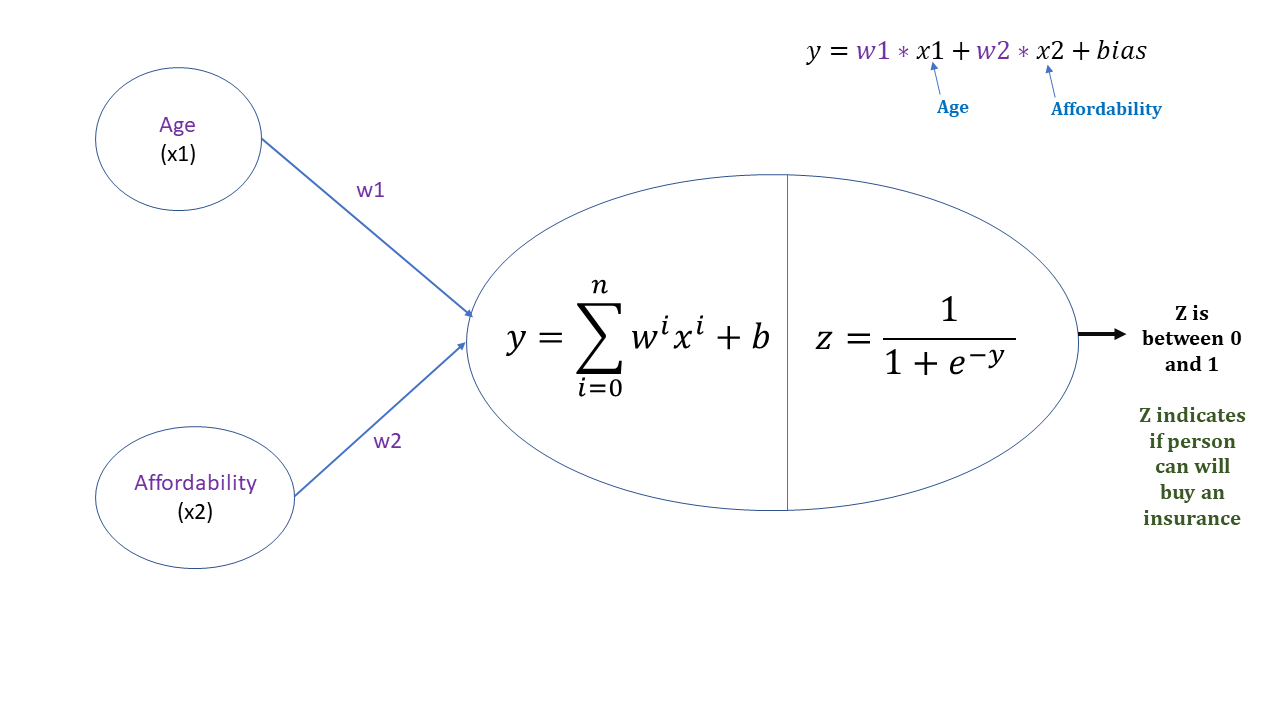

In [84]:
model = keras.Sequential([
    keras.layers.Dense(1,input_shape=(2,),activation='sigmoid',kernel_initializer='ones',bias_initializer='zeros') # kernel_initializer = 1 => all weights are initialized to 1
]) # one and only one layer that too is input layer, having 2 neurons in it. its output is 1 neuron vali layer. neuron first linear operation apply krta hai features pr, then that result ko activation function ko de deta hai jo use 0 and 1 ke form me activate kr deta hai

In [85]:
model.compile(
    optimizer  = 'adam',
    loss='binary_crossentropy', # binary cross entropy is same as log loss
    metrics = ['accuracy']
)

In [86]:
model.fit(x_train_scaled,y_train,epochs = 5000)

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 12ms/step - loss: 0.5436 - accuracy: 0.7273
Epoch 2502/5000
1/1 [==============================] - 0s 13ms/step - loss: 0.5436 - accuracy: 0.7273
Epoch 2503/5000
1/1 [==============================] - 0s 12ms/step - loss: 0.5435 - accuracy: 0.7273
Epoch 2504/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.5435 - accuracy: 0.7273
Epoch 2505/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.5435 - accuracy: 0.7273
Epoch 2506/5000
1/1 [==============================] - 0s 11ms/step - loss: 0.5434 - accuracy: 0.7273
Epoch 2507/5000
1/1 [==============================] - 0s 11ms/step - loss: 0.5434 - accuracy: 0.7273
Epoch 2508/5000
1/1 [==============================] - 0s 10ms/step - loss: 0.5433 - accuracy: 0.7273
Epoch 2509/5000
1/1 [==============================] - 0s 12ms/step - loss: 0.5433 - accuracy: 0.7273
Epoch 2510/5000
1/1 [==========================

as per our command, 5000 bar weights ka adjustment hua, using gradient descent

In [87]:
model.evaluate(x_test_scaled,y_test)

1/1 [==============================] - 0s 182ms/step - loss: 0.3153 - accuracy: 1.0000


[0.3152588903903961, 1.0]

In [88]:
x_test_scaled

,age,affordibility
1,0.25,0
0,0.22,1
14,0.49,1
9,0.61,1
19,0.18,1
17,0.58,1


In [89]:
model.predict(x_test_scaled)


1/1 [==============================] - 0s 95ms/step


array([[0.16282038],
       [0.41183817],
       [0.72550565],
       [0.82668287],
       [0.3651319 ],
       [0.80450743]], dtype=float32)

< 0.5 => 0; and > 0.5 => 1

varification is given below

In [90]:
y_test

1     0
0     0
14    1
9     1
19    0
17    1
Name: bought_insurance, dtype: int64

In [91]:
coef , intercept = model.get_weights()
coef, intercept

(array([[4.919666 ],
        [1.4286091]], dtype=float32),
 array([-2.8673074], dtype=float32))

(array([[4.919666 ],
        [1.4286089]], dtype=float32) : this is final weights,

        
 array([-2.8673072], dtype=float32)) : this is final bias value

**Instead of model.predict, write our own prediction function that uses w1,w2 and bias**

In [92]:
import math
def sigmoid(x):
  return 1/(1+math.exp(-x))

In [93]:
def prediction_function(age, affordibility):
    weighted_sum = coef[0]*age + coef[1]*affordibility + intercept
    return sigmoid(weighted_sum)

prediction_function(.47, 1)

0.7054827391901236

In [94]:
prediction_function(.18,1)

0.3651319187678096

# aage ka continution , building from scratch : 54th part ma hai